In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\excel\\data.csv')

In [5]:
df.head(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [7]:
df.tail(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0
6809,9789042003408,9042003405,'I'm Telling You Stories',Jeanette Winterson and the Politics of Reading,Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998.0,3.70,136.0,10.0


In [9]:
df=df.dropna()

In [11]:
df.tail()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
6790,9783856305581,3856305580,C.G. Jung and Hermann Hesse,A Record of Two Friendships,Miguel Serrano,Psychology,http://books.google.com/books/content?id=sQt8b...,"Miguel Serrano, a Chilean diplomat and writer ...",1997.0,4.03,142.0,373.0
6793,9784766113389,4766113381,How to Draw Manga,Girls' Life Illustration File,Kazuko Tadano,Art,http://books.google.com/books/content?id=N3s3G...,This volume was inspired by young women workin...,2003.0,4.14,132.0,65.0
6796,9784770028037,4770028032,日本語の感情表現集,Expressing Emotions in Japanese,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002.0,3.54,176.0,27.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6809,9789042003408,9042003405,'I'm Telling You Stories',Jeanette Winterson and the Politics of Reading,Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998.0,3.70,136.0,10.0


In [13]:
df['categories'].value_counts()

categories
Fiction                             595
Biography & Autobiography           247
History                             162
Religion                             81
Juvenile Fiction                     68
                                   ... 
British                               1
Diary fiction                         1
Literary Criticism & Collections      1
Art museum curators                   1
Meditation                            1
Name: count, Length: 187, dtype: int64

In [15]:
df['published_year'].value_counts()

published_year
2006.0    338
2005.0    233
2004.0    206
2003.0    205
2002.0    158
         ... 
1970.0      1
1956.0      1
1941.0      1
2009.0      1
2010.0      1
Name: count, Length: 68, dtype: int64

In [23]:
df['authors'].value_counts()

authors
John Ronald Reuel Tolkien                   12
Agatha Christie                             11
Hunter S. Thompson                          10
Orson Scott Card                             7
Raymond E. Feist                             7
                                            ..
John Milton;Scott Elledge                    1
Kate Chopin;Margo Culley                     1
Henry David Thoreau                          1
Henry James;Deborah Esch;Jonathan Warren     1
Helena Grice;Tim Woods                       1
Name: count, Length: 1718, dtype: int64

In [31]:
top_auth = df['authors'].value_counts().head(10)

In [33]:
top_auth

authors
John Ronald Reuel Tolkien    12
Agatha Christie              11
Hunter S. Thompson           10
Orson Scott Card              7
Raymond E. Feist              7
Stephen King                  6
Paul Auster                   6
Robert Jordan                 6
Stephen Jay Gould             6
Christopher Hitchens          6
Name: count, dtype: int64

In [35]:
top_auth = df['authors'].value_counts().tail(10)

In [37]:
top_auth

authors
William Shakespeare;Peter Hulme;William Howard Sherman    1
Wole Soyinka;Simon Gikandi                                1
Bernard Shaw                                              1
Mary Wollstonecraft Shelley;J. Paul Hunter                1
Daniel Defoe;Michael Shinagel                             1
John Milton;Scott Elledge                                 1
Kate Chopin;Margo Culley                                  1
Henry David Thoreau                                       1
Henry James;Deborah Esch;Jonathan Warren                  1
Helena Grice;Tim Woods                                    1
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_828\1121962098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['published_year'], palette='viridis')


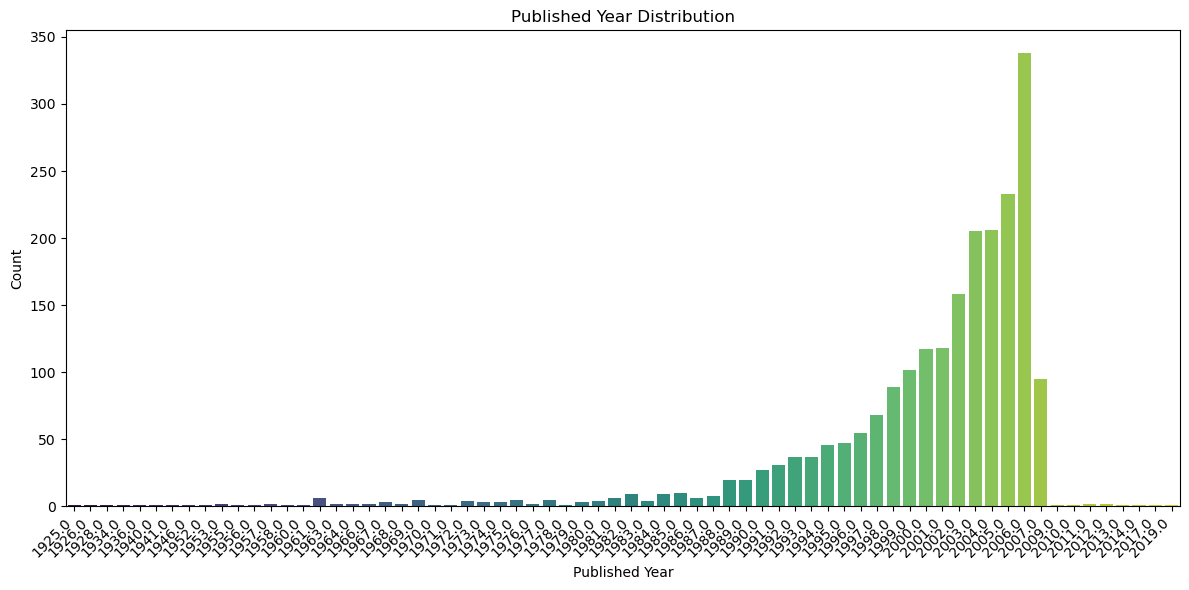

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['published_year'], palette='viridis')
plt.title('Published Year Distribution')
plt.xlabel('Published Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_828\3683849857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['num_pages'], palette='viridis')


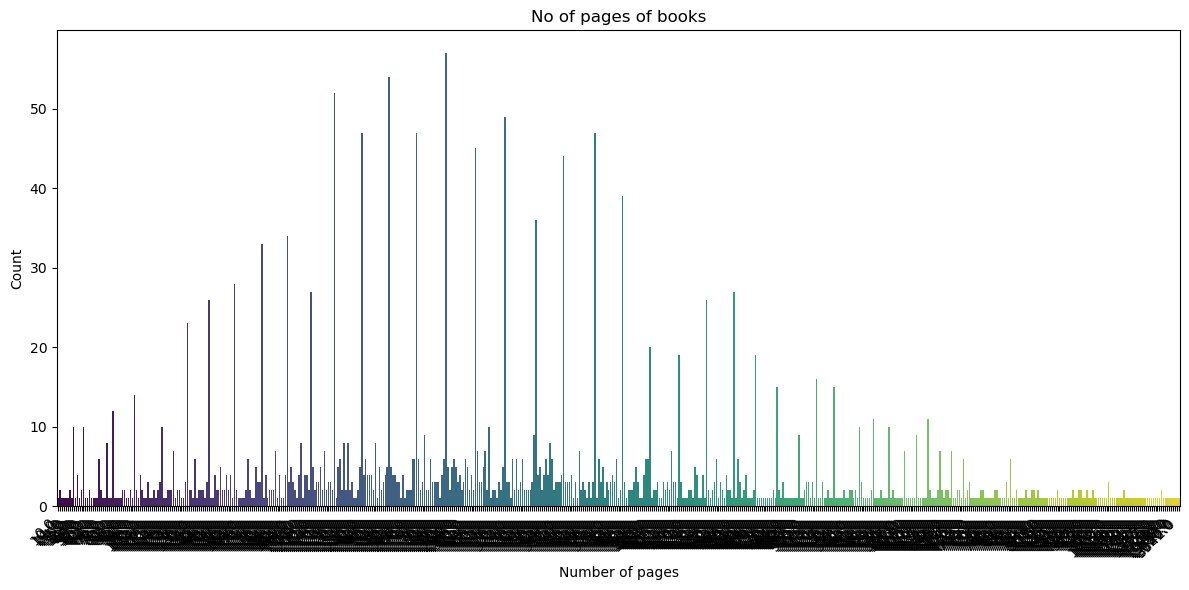

In [133]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['num_pages'], palette='viridis')
plt.title('No of pages of books')
plt.xlabel('Number of pages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

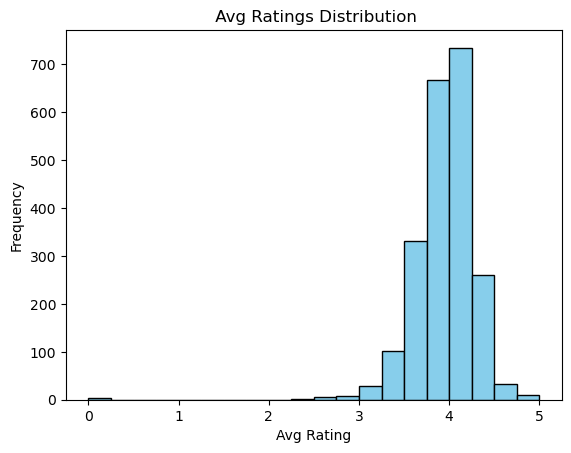

In [17]:
plt.hist(df['average_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title(' Avg Ratings Distribution')
plt.xlabel('Avg Rating')
plt.ylabel('Frequency')
plt.show()

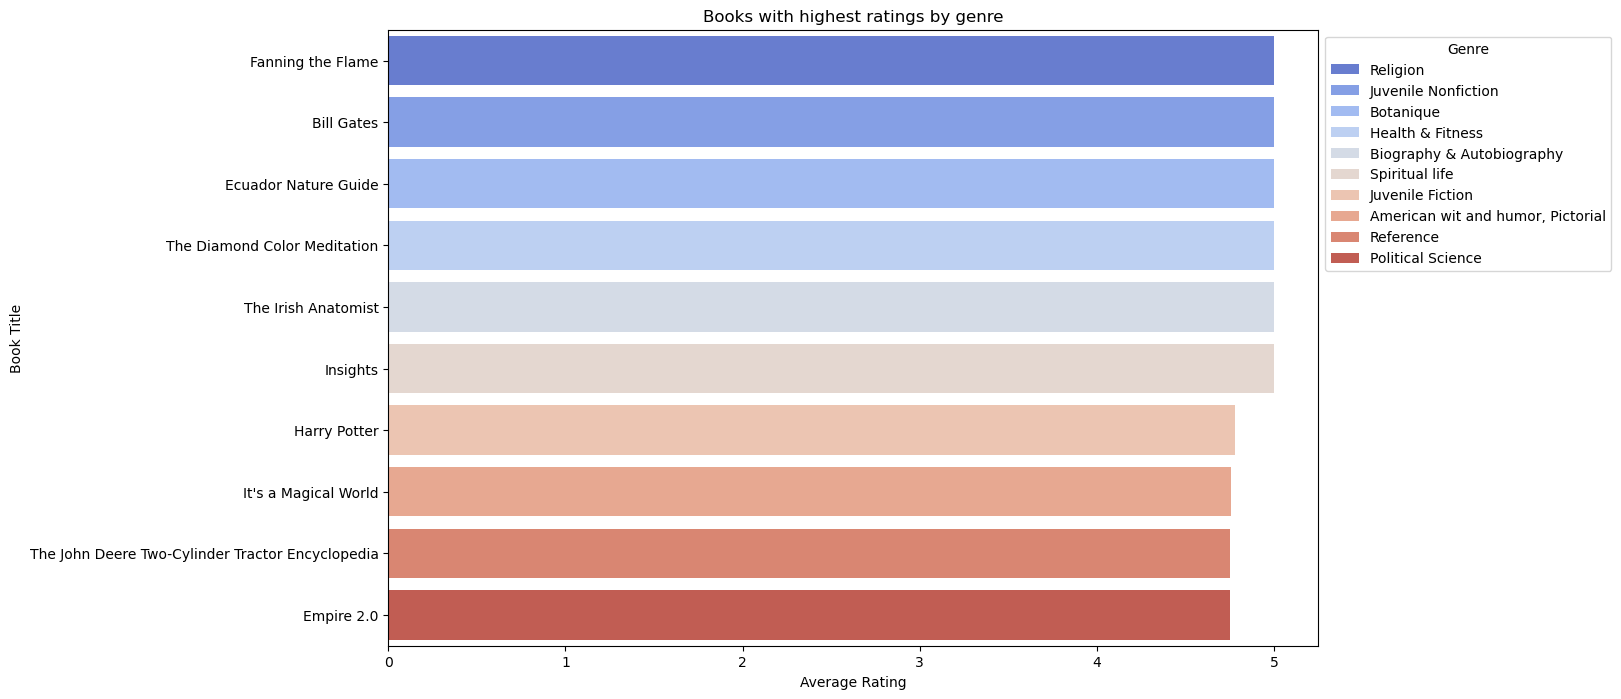

In [25]:
top_rated_books = df.nlargest(10, 'average_rating')

plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='title', hue='categories', data=top_rated_books, palette='coolwarm')
plt.title('Books with highest ratings by genre')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

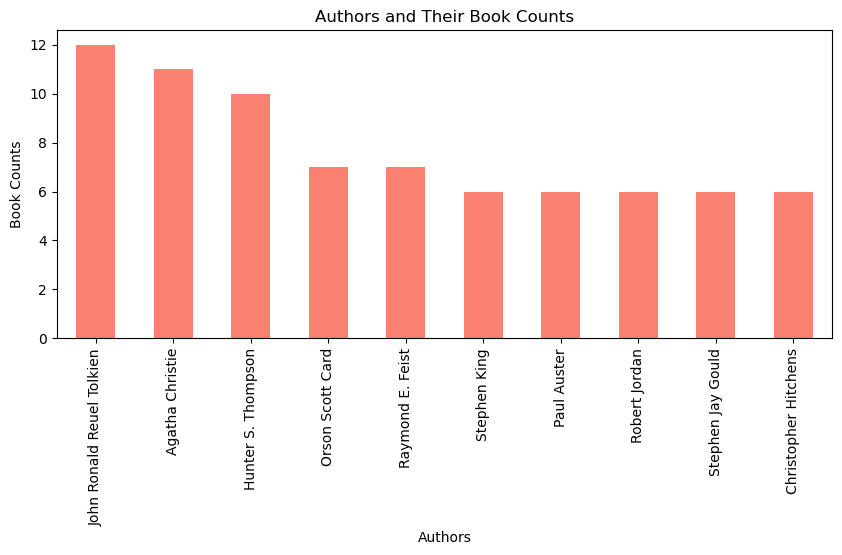

In [29]:
top_auth = df['authors'].value_counts().head(10)
plt.figure(figsize=(10, 4))
top_auth.plot(kind='bar', color='salmon')
plt.title('Authors and Their Book Counts')
plt.xlabel('Authors')
plt.ylabel('Book Counts')
plt.show()

In [39]:
df.isna().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [41]:
df['text'] = df['title'] + ' ' + df['subtitle'] + ' ' + df['description']

In [43]:
df['text']

1       Spider's Web A Novel A new 'Christie for Chris...
7       Empires of the Monsoon A History of the Indian...
8       The Gap Into Madness Chaos and Order A new-cov...
25      Miss Marple The Complete Short Stories Miss Ma...
34      'Tis A Memoir FROM THE PULIZER PRIZE-WINNING A...
                              ...                        
6790    C.G. Jung and Hermann Hesse A Record of Two Fr...
6793    How to Draw Manga Girls' Life Illustration Fil...
6796    日本語の感情表現集 Expressing Emotions in Japanese This...
6805    I Am that Talks with Sri Nisargadatta Maharaj ...
6809    'I'm Telling You Stories' Jeanette Winterson a...
Name: text, Length: 2182, dtype: object

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

In [87]:
def embeded_text(text):
    words = word_tokenize(text)
    word_embeded = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    
    if not word_embeded:
        return np.zeros(word2vec_model.vector_size)
    
    return np.mean(word_embeded, axis=0)

In [89]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

corpus = ['This is an example sentence for training', 'Another sentence with words']
tokenized_corpus = [word_tokenize(sentence) for sentence in corpus]
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [91]:
df['word_embeded'] = df['text'].apply(embeded_text)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities_word2vec = cosine_similarity(df['word_embeded'].tolist())

In [93]:
def get_recommendations_word2vec(book_title):
    idx = df[df['title'] == book_title].index[0]
    book_scores = list(enumerate(cosine_similarities_word2vec[idx]))
    book_scores = sorted(book_scores, key=lambda x: x[1], reverse=True)
    book_scores = book_scores[1:11] 

    book_indices = [i[0] for i in book_scores]
    return df['title'].iloc[book_indices]

In [123]:
book_title = 'The Lord of the Rings, the Return of the King'
recommendations_word2vec = get_recommendations_word2vec(book_title)
print(recommendations_word2vec)

['The Wicked Day', 'Every Tongue Got to Confess', 'The Gangs of New York', 'Word Freak', 'Marked', 'The Memory of Whiteness', 'Chasing the Monsoon', 'Merrick', "The Devil's Labyrinth", 'The Navigator']


In [127]:
book_title = 'The Gangs of New York'
recommendations_word2vec = get_recommendations_word2vec(book_title)
print(recommendations_word2vec)

['Empires of the Monsoon', 'The Gap Into Madness', 'Miss Marple', "'Tis", 'A Small Pinch of Weather', 'Tree and Leaf', 'The Lord of the Rings, the Return of the King', 'The Lord of the Rings', 'Lirael', 'Breaking Open the Head']
